# Сборный проект:

Мы аналитики крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты. 

## **Часть 1. Приоритизация гипотез**

Задача  
Применить фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
Применить фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
Указать как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

**Описание данных**  
9 гипотез по увеличению выручки интернет-магазина с указанными параметрами  
Reach, Impact, Confidence, Effort.  

Hypothesis — краткое описание гипотезы;  
Reach — охват пользователей по 10-балльной шкале;  
Impact — влияние на пользователей по 10-балльной шкале;  
Confidence — уверенность в гипотезе по 10-балльной шкале;  
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.  
Чем больше значение Efforts, тем дороже проверка гипотезы.

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import scipy.stats as stats
from math import factorial
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None) #добавили функции для отображения всех строк и столбцов при выводе
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.3f}'.format

In [2]:
data_hypothesis = pd.read_csv('/datasets/hypothesis.csv')
#data_hypothesis = pd.read_csv('/Users/ekaterinakamorkina/Downloads/hypothesis.csv')

In [3]:
data_hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
data_hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Промежуточный вывод. Подключили все библиотеки для успешной работы.  
Далее провела анализ общей информации  
В таблице  — 9 строк и 5 столбцов

In [5]:
data_hypothesis['ICE']=(data_hypothesis['Impact']*data_hypothesis['Confidence'])/data_hypothesis['Efforts']
data_hypothesis[['Hypothesis','ICE']].sort_values(by = 'ICE',ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


Наиболее перпективные гипотезы **8, 0, 7** так как у них выские показатели Impact (Влияние) и Confidence (Уверенность). Стоит заметить различие между 8 и 0 гипотезой, т.к среднее Impact и Confidence у них одинаковое, а вот Efforts меньше у 8 гипотезы. А значит конечный показатель выше

In [6]:
data_hypothesis['RICE']=(data_hypothesis['Reach']*data_hypothesis['Impact']*data_hypothesis['Confidence'])/data_hypothesis['Efforts']
data_hypothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000


Наиболее перспективные гипотезы: **7, 2, 0, 6**. Однако на первом месте с большим отрывом находится гипотеза **7 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'**. Это произошло потому, что у нее Reach равен 10, в то время как у других гипотез он меньше. Также в список перспективных гипотез добавился вариант **2**, благодаря тоже высокому Reach.  
Однако вариант **8** здесь не считается удачным, так как у него самый низкий Reach.  
Ведь кроме силы гипотезы необходимо учитывать, сколько пользователей она затронет.  

**Вывод**

В результате, наиболее перспективные гипотезы, такие как 7  'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок', 2, 0 и 8, демонстрируют высокие показатели Impact и Confidence (стоит заметить что во 2 гипотезе Impact очень низкий, но и efforts низкий ), но также важно учитывать Reach, чтобы определить реальную ценность и масштаб внедрения. Гипотеза 7 выделяется благодаря своему высокому Reach, что делает ее особенно привлекательной для реализации. В то же время гипотеза 8, несмотря на хорошие показатели Impact и Confidence, не является удачным вариантом из-за низкого охвата, что подчеркивает необходимость комплексного подхода к оценке гипотез.  
Гипотеза № 0 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей' перспективная по обоим методам

К неудачным гипотезам относятся гипотезы 1, 3, 5, 4
Они занимают невыгодные позиции либо из-за высокой стоимости и сложности проверки, либо из-за ограниченного охвата, что приводит к низкому уровню влияния на изменения метрик.

## Часть 2. Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv.

orders.csv  
transactionId — идентификатор заказа;  
visitorId — идентификатор пользователя, совершившего заказ;  
date — дата, когда был совершён заказ;  
revenue — выручка заказа;  
group — группа A/B-теста, в которую попал заказ.  

visitors.csv  
date — дата;  
group — группа A/B-теста;  
visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Задача
Проанализируйте A/B-тест:  
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
-Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.  
-Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.  
-Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.  
-Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.  
-Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.  

-Примите решение по результатам теста и объясните его. Варианты решений:  
1. Остановить тест, зафиксировать победу одной из групп.  
2. Остановить тест, зафиксировать отсутствие различий между группами.  
3. Продолжить тест.

In [7]:
data_orders = pd.read_csv('/datasets/orders.csv')
data_visitors = pd.read_csv('/datasets/visitors.csv')
#data_orders = pd.read_csv('/Users/ekaterinakamorkina/Downloads/orders.csv')
#data_visitors = pd.read_csv('/Users/ekaterinakamorkina/Downloads/visitors.csv')

In [8]:
data_orders.info()
data_orders.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [9]:
data_orders.describe()

,transactionId,visitorId,revenue
count,"1,197.000","1,197.000","1,197.000"
mean,"2,155,621,385.530","2,165,960,143.099","8,348.006"
std,"1,229,084,904.760","1,236,014,192.147","39,191.132"
min,"1,062,393.000","5,114,589.000",50.000
25%,"1,166,775,572.000","1,111,826,046.000","1,220.000"
50%,"2,145,193,898.000","2,217,984,702.000","2,978.000"
75%,"3,237,740,112.000","3,177,606,451.000","8,290.000"
max,"4,293,855,558.000","4,283,872,382.000","1,294,500.000"


In [10]:
display('Колличество дубликатов:', data_orders.duplicated().sum())
display('Пропуски', data_orders.isna().sum())

'Колличество дубликатов:'

0

'Пропуски'

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [11]:
data_visitors.info()
data_visitors.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [12]:
display('Колличество дубликатов:', data_visitors.duplicated().sum())
display('Пропуски', data_visitors.isna().sum())

'Колличество дубликатов:'

0

'Пропуски'

date        0
group       0
visitors    0
dtype: int64

In [13]:
data_orders['date'] = pd.to_datetime(data_orders['date'], format='%Y-%m-%d')
data_visitors['date'] = pd.to_datetime(data_visitors['date'], format='%Y-%m-%d')
data_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**Промежуточный вывод**  
Полных дубликатов не обнаружено. Пропусков тоже нет.  
Изменили тип данных в столбце дата на datetime.

In [14]:
(data_orders.groupby( 'visitorId') .agg({'group': 'nunique'}) > 1).mean()

group   0.056
dtype: float64

In [15]:
group_a = data_orders[data_orders['group'] == 'A']['visitorId']
group_b = data_orders[data_orders['group'] == 'B']['visitorId']
group_ab = data_orders.query('visitorId in @group_a and visitorId in @group_b')
display(group_ab['visitorId'].unique())
print('Количество пользователей в двух группах:', group_ab['visitorId'].nunique())
print('Всего пользователей:', data_orders['visitorId'].nunique())

array([4069496402,  963407295,  351125977, 3234906277,  199603092,
        237748145, 3803269165, 2038680547, 2378935119, 4256040402,
       2712142231,    8300375,  276558944,  457167155, 3062433592,
       1738359350, 2458001652, 2716752286, 3891541246, 1648269707,
       3656415546, 2686716486, 2954449915, 2927087541, 2579882178,
       3957174400, 2780786433, 3984495233,  818047933, 1668030113,
       3717692402, 2044997962, 1959144690, 1294878855, 1404934699,
       2587333274, 3202540741, 1333886533, 2600415354, 3951559397,
        393266494, 3972127743, 4120364173, 4266935830, 1230306981,
       1614305549,  477780734, 1602967004, 1801183820, 4186807279,
       3766097110, 3941795274,  471551937, 1316129916,  232979603,
       2654030115, 3963646447, 2949041841])

Количество пользователей в двух группах: 58
Всего пользователей: 1031


In [16]:
group_ab['revenue'].describe()

count      181.000
mean     8,612.901
std     14,161.551
min         50.000
25%      1,530.000
50%      3,460.000
75%      8,439.000
max     93,940.000
Name: revenue, dtype: float64

**Промежуточный вывод**  
5,6% пользователей участвуют в обеих группах, что составляет 58 человек из 1031. Эти пользователи сделали 181 заказ в среднем на сумму 8612 рублей. Учитывая небольшой процент пересекающихся пользователей и важное условие A/B теста, согласно которому не должно быть пересечений, мы принимаем решение удалить этих пользователей.

In [17]:
orders = data_orders[~data_orders['visitorId'].isin(group_ab['visitorId'])]
print('Всего пользователей в тесте осталось:', orders['visitorId'].nunique())

Всего пользователей в тесте осталось: 973


### График кумулятивной выручки по группам

In [18]:
datesGroups = orders[['date','group']].drop_duplicates() 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: data_visitors[np.logical_and(data_visitors['date'] <= x['date'], data_visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(orders.head(5))
print(data_visitors.head(5))
print(cumulativeData.head(5))

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B
5      182168103   935554773 2019-08-15     2210     B
        date group  visitors
0 2019-08-01     A       719
1 2019-08-02     A       619
2 2019-08-03     A       507
3 2019-08-04     A       717
4 2019-08-05     A       756
        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


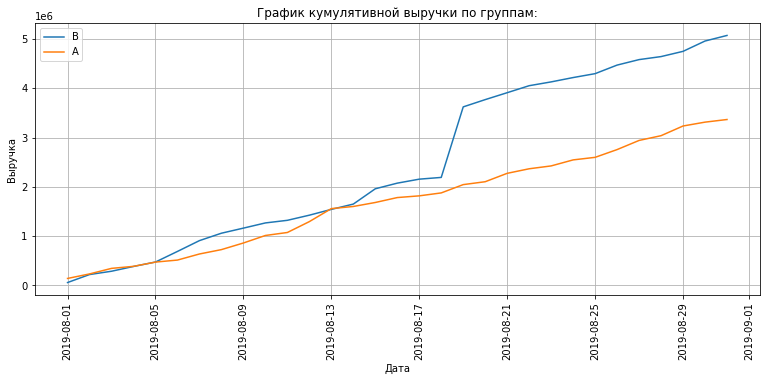

In [19]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы B
plt.figure(figsize=(13,5))
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.legend()
plt.xticks(rotation=90)
plt.title('График кумулятивной выручки по группам:')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.show()

В начале исследования группы A и B демонстрировали одинаковые результаты, и в течение всего месяца выручка обеих групп увеличивалась линейно. Однако 18 августа произошол скачок в продажах, после чего группа B начала показывать результаты примерно в 1,5 раза лучше.

### График кумулятивного среднего чека по группам

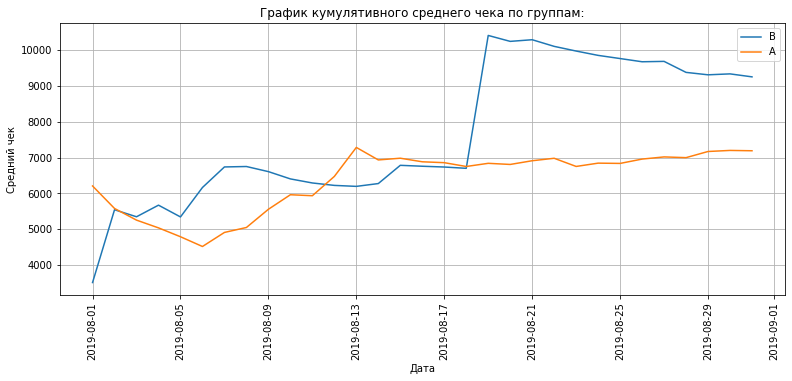

In [20]:
plt.figure(figsize=(13,5))
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.legend()
plt.xticks(rotation=90)
plt.title('График кумулятивного среднего чека по группам:')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid()
plt.show()

Коллебания среднего чека было до 19.08, далее продажи более стабилизировались у обеих групп. 18.08 средний чек вырос в 1,5 раза у группы В. Скорей всего в тот день была новая поставка товара , что так резко увелило средней чек. В тоже время у группы А никаких изменений в продажах не произошло.  
За весь месяц в группе А средний чек вырос на 15%. Тогда как в группе В на 350%

### График относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

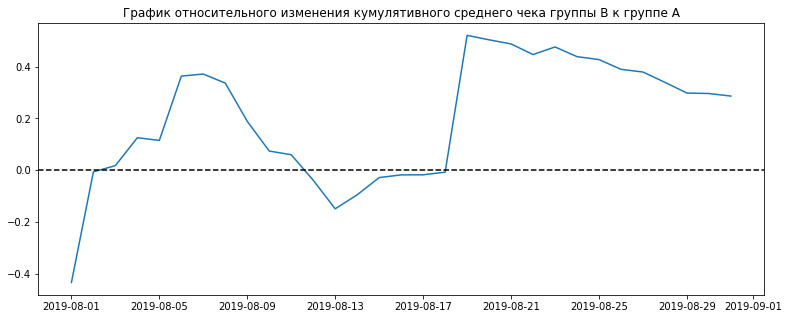

In [21]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(13,5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

Отношение среднего чека группы B к группе A началось с отрицательного значения - 0.4, далее было 2 скачка, видимо связано с новыми условиями продаж или с постпулением новых товаров. Дальше ситуация изменилась и с 12.08 по 18.08 отношение было близко к 0. Далее снова резкий скачок вверх и потом плавный спад. Значит версия подтвержается о большой поставке товарова в группе В 18 числа 

### График кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

Text(0.5, 0, 'Дата')

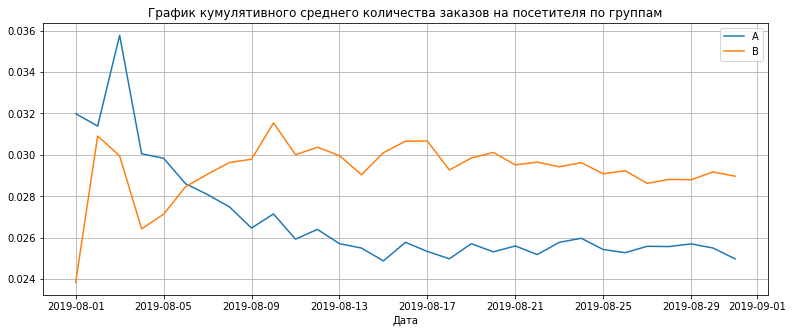

In [22]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
plt.figure(figsize=(13,5))
plt.grid()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('Дата')

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

Text(0.5, 0, 'Дата')

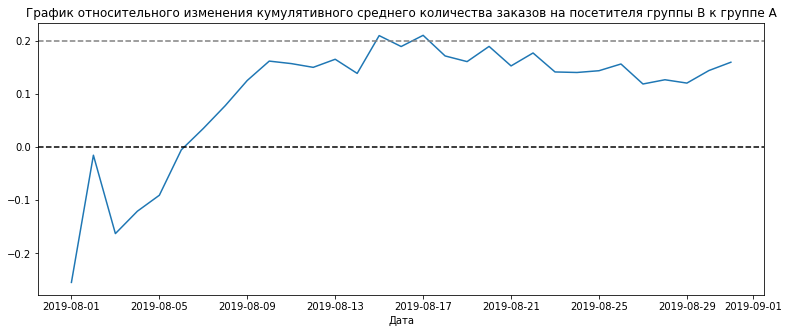

In [23]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(13,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.xlabel('Дата')

В начале тестирования группа В уступала группе А, однако вскоре смогла обойти её. Среднее количество заказов у группы В быстро увеличивалось, затем последовал медленный спад. Под конец месяца заказы группы В снова немного увеличивается. Прослеживается влияние крупных заказов на общую динамику

### Точечный график количества заказов по пользователям. Сделайте выводы и предположения.

      visitorId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


Text(0, 0.5, 'Кол-во заказов')

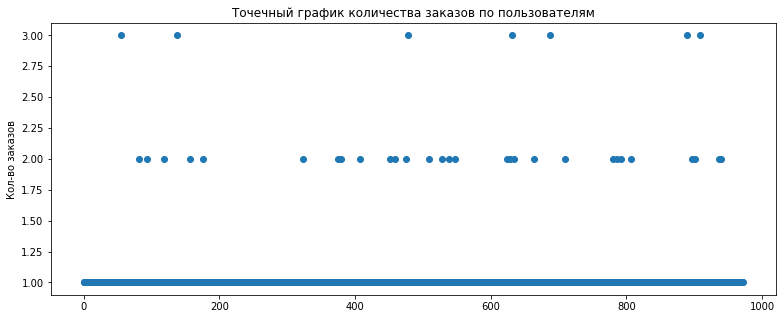

In [24]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
plt.figure(figsize=(13,5))
plt.title('Точечный график количества заказов по пользователям')
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.ylabel('Кол-во заказов')

Основная группа покупателей состоит из тех, кто совершил единственную покупку в интернет-магазине. Также значительное количество клиентов сделали две покупки, в то время как еще менее число заказов приходится на тех, кто покупал трижды

### Вычислить 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [25]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


Лишь 1% покупателей сделали 2 и более заказов.

### Точечный график стоимостей заказов. Сделайте выводы и предположения.

In [26]:
orders['revenue'].describe()

count       1,016.000
mean        8,300.815
std        42,121.992
min            50.000
25%         1,190.000
50%         2,955.000
75%         8,134.250
max     1,294,500.000
Name: revenue, dtype: float64

Text(0, 0.5, 'Стоимость заказов, руб.')

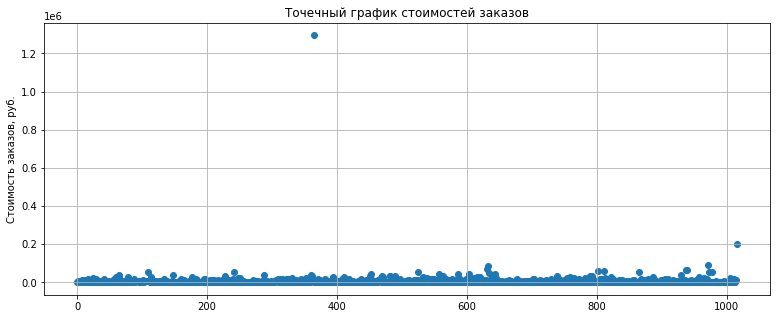

In [27]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(13,5))
plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.scatter(x_values, orders['revenue'])
plt.ylabel('Стоимость заказов, руб.')

Один заказ свыше 12 млн - будем считать за выброс, чтоб детальнее расмотреть другие заказы

Text(0, 0.5, 'Стоимость заказов, руб.')

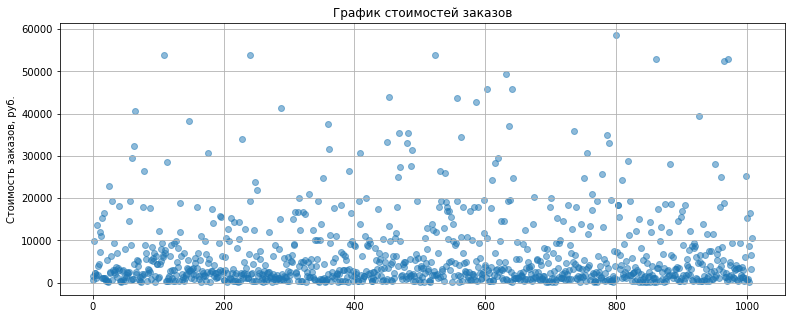

In [28]:
orders_new = orders[orders['revenue']<=60000]['revenue']
xn_values = pd.Series(range(0,len(orders_new )))
plt.figure(figsize=(13,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(xn_values, orders_new, alpha=0.5);
plt.ylabel('Стоимость заказов, руб.')

Большинство заказов на сумму менее 10000 руб. Минимальный заказ 50 руб, максимальный  1,294,500 руб.

### Вычислить 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [29]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Всего 1% заказов имеет стоимость более 53904 руб. Будем считать это выбросами. 95% заказов суммой менее 26785 руб.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.  

Нулевая гипотеза - статистически значимых различий в среднем колличестве заказов между группами нет,  
альтернативная гипотеза - статистически значимые различия есть  
Уровень значимости 0.05

In [30]:
visitorsADaily = data_visitors[data_visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = data_visitors[data_visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('p-value',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительное различие',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value 0.011
Относительное различие 0.160


P-value 0.011 свидетельствует о статистической значимости результатов, что позволяет нам отвергнуть нулевую гипотезу о равенстве групп А и В.  
Статистически значимое различие между сравниваемыми группами составляет 16%

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.  

Нулевая гипотеза - статистически значимых различий в среднем чеке между группами нет,  
альтернативная гипотеза - статистически значимые различия есть  
Уровень значимости 0.05

In [31]:
print('p-value','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value 0.829
Относительное различие 0.287


### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.  

Приминяем за аномальных пользователей тех, кто совершил 2 заказа и более, или совершил заказ на сумму свыше 53904 рублей. Так мы убираем 1% пользователей с наибольшим числом заказов и от 1% с наибольшей стоимостью. 
Сделаем срезы пользователей с числом заказов больше 2 — usersorders_too и пользователей, совершивших заказы дороже 53904 — usersorders_revenue.   
Объединим их в таблице abnormalUsers, удалим дубликаты, отсортируем по возрастанию. 

In [32]:
usersorders_too = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] >= 2]['visitorId'],
    ],
    axis=0,
)
usersorders_revenue = orders[orders['revenue'] > 53904]['visitorId']
abnormalUsers = (
    pd.concat([usersorders_too, usersorders_revenue], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
33      249864742
36      366673373
51      406208401
67      522292794
Name: visitorId, dtype: int64
45


Получилось 45 аномальных пользователей

Теперь на очищенных данных проверем повторно гипотезы  

Нулевая гипотеза - статистически значимых различий в среднем колличестве заказов между группами нет,  
альтернативная гипотеза - статистически значимые различия есть  
Уровень значимости 0.05

In [33]:
AFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

BFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value',"{0:.3f}".format(stats.mannwhitneyu(AFiltered, BFiltered)[1]))
print('Относительное различие',"{0:.3f}".format(BFiltered.mean()/AFiltered.mean()-1))

p-value 0.008
Относительное различие 0.188


P-value 0.008 указывает на статистическую значимость результатов, что позволяет отвергнуть нулевую гипотезу о том, что между группами нет статистически значимых различий в среднем количестве заказов. Относительное различие составляет 0.188, что свидетельствует о том, что наблюдаемое различие между группами составляет 18.8%.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.  

In [34]:
print('p-value',"{0:.3f}".format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],orders[np.logical_and( orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1]))

print('Относительное различие',"{0:.3f}".format( orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()/ orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()- 1))

p-value 0.969
Относительное различие 0.002


### Требуется ли продолжение теста? 

Различий в среднем чеке заказа между группами по «очищенным» данным и «неочищенным» данным нет. И там и там мы не смогли отвергнуть гипотезу. 
Но в то же время  различия в среднем количестве заказов на посетителя между группами есть, даже после того как убрали аномальные заказы. Это может указывать на то, что группа В более эффективна в привлечении повторных покупок или в конверсии посетителей в покупателей.
Также, глядя на график кумулятивного среднего количества заказов на посетителя по группам, группа В явно выигрывает, поэтому **принимаем решение остановить тест и фиксируем победу группы В**.  


## Вывод

1. Наиболее перспективная гипотеза № 7 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'.

   Вариант № 8 'Запустить акцию, дающую скидку на товар в день рождения' не совсем считается удачным, так как у него самый низкий охват.  Ведь кроме силы гипотезы необходимо учитывать, сколько пользователей она затронет. Гипотеза № 0 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей' перспективная по обоим методам исследования.

2. Завершили A/B тест и зафиксировали победу группы В. Группа В показывает явное преимущество на графиках кумулятивного среднего количества заказов и кумулятивного среднего чека. Хотя мы не смогли отвергнуть нулевую гипотезу о равенстве средних чеков, нулевая гипотеза о том, что между группами нет статистически значимых различий в среднем количестве заказов, была отвергнута. Результаты тестирования группы В свидетельствуют о том, что ее конверсия выше, чем у группы А.